In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#reading dataset
drought_states = pd.read_csv('./data/drought_state.csv')

In [3]:
drought_states.head()

,Name,state,ValidStart,ValidEnd,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,population_d0,population_d1,population_d2,population_d3,population_d4,DSCI,total_area,total_population
0,Alaska,AK,2021-12-07,2021-12-13,582568.29,0.0,0.0,0.0,0.0,0.0,709629.99,0.0,0.0,0.0,0.0,0.0,0,582568.29,709629.99
1,Alaska,AK,2021-11-30,2021-12-06,582568.29,0.0,0.0,0.0,0.0,0.0,709629.99,0.0,0.0,0.0,0.0,0.0,0,582568.29,709629.99
2,Alaska,AK,2021-11-23,2021-11-29,582568.29,0.0,0.0,0.0,0.0,0.0,709629.99,0.0,0.0,0.0,0.0,0.0,0,582568.29,709629.99
3,Alaska,AK,2021-11-16,2021-11-22,582568.29,0.0,0.0,0.0,0.0,0.0,709629.99,0.0,0.0,0.0,0.0,0.0,0,582568.29,709629.99
4,Alaska,AK,2021-11-09,2021-11-15,582568.29,0.0,0.0,0.0,0.0,0.0,709629.99,0.0,0.0,0.0,0.0,0.0,0,582568.29,709629.99


In [4]:
drought_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56888 entries, 0 to 56887
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              56888 non-null  object 
 1   state             56888 non-null  object 
 2   ValidStart        56888 non-null  object 
 3   ValidEnd          56888 non-null  object 
 4   area_none         56888 non-null  float64
 5   area_d0           56888 non-null  float64
 6   area_d1           56888 non-null  float64
 7   area_d2           56888 non-null  float64
 8   area_d3           56888 non-null  float64
 9   area_d4           56888 non-null  float64
 10  population_none   56888 non-null  float64
 11  population_d0     56888 non-null  float64
 12  population_d1     56888 non-null  float64
 13  population_d2     56888 non-null  float64
 14  population_d3     56888 non-null  float64
 15  population_d4     56888 non-null  float64
 16  DSCI              56888 non-null  int64 

### Add 9 drought regions column

In [5]:
oh='Ohio Valley'
ohio_valley=dict.fromkeys(['Illinois','Indiana','Kentucky','Missouri',
             'Ohio','Tennessee','West Virginia'],oh)
#https://stackoverflow.com/questions/11977730/creating-a-dictionary-with-same-values
ohio_valley


{'Illinois': 'Ohio Valley',
 'Indiana': 'Ohio Valley',
 'Kentucky': 'Ohio Valley',
 'Missouri': 'Ohio Valley',
 'Ohio': 'Ohio Valley',
 'Tennessee': 'Ohio Valley',
 'West Virginia': 'Ohio Valley'}

In [6]:
def state_region_dict(list_states,string_region):
    return dict.fromkeys(list_states,string_region)
#function to combine states and region into dictionary

In [7]:
um_list=['Iowa', 'Michigan', 'Minnesota', 'Wisconsin']
um_region='Upper Midwest'
upper_midwest=state_region_dict(um_list,um_region)
upper_midwest

{'Iowa': 'Upper Midwest',
 'Michigan': 'Upper Midwest',
 'Minnesota': 'Upper Midwest',
 'Wisconsin': 'Upper Midwest'}

In [8]:
ne_list=['Connecticut','Delaware','Maine','Maryland','Massachusetts', 'New Hampshire', 'New Jersey',
        'New York', 'Pennsylvania','Rhode Island','Vermont']
ne_region='Northeast'
north_east=state_region_dict(ne_list,ne_region)
north_east

{'Connecticut': 'Northeast',
 'Delaware': 'Northeast',
 'Maine': 'Northeast',
 'Maryland': 'Northeast',
 'Massachusetts': 'Northeast',
 'New Hampshire': 'Northeast',
 'New Jersey': 'Northeast',
 'New York': 'Northeast',
 'Pennsylvania': 'Northeast',
 'Rhode Island': 'Northeast',
 'Vermont': 'Northeast'}

In [9]:
nw_list=['Idaho','Oregon','Washington']
nw_region='Northwest'
north_west=state_region_dict(nw_list,nw_region)

s_list=['Arkansas','Kansas','Louisiana','Mississippi','Oklahoma','Texas']
s_region='South'
south=state_region_dict(s_list,s_region)

se_list=['Alabama','Florida','Georgia','North Carolina','South Carolina','Virginia']
se_region='Southeast'
south_east=state_region_dict(se_list,se_region)

sw_list=['Arizona','Colorado','New Mexico','Utah']
sw_region='Southwest'
south_west=state_region_dict(sw_list,sw_region)

w_list=['California','Nevada']
w_region='West'
west=state_region_dict(w_list,w_region)

wnc_list=['Montana','Nebraska','North Dakota','South Dakota','Wyoming']
wnc_region='Northern Rockies and Plains'
northern_rockies=state_region_dict(wnc_list,wnc_region)

In [10]:
final_dict={**ohio_valley,**upper_midwest,**north_east,**north_west,**south,
            **south_east,**south_west,**west,**northern_rockies}
final_dict
#combine multiple dictionaries into one
#https://towardsdatascience.com/merge-dictionaries-in-python-d4e9ce137374

{'Illinois': 'Ohio Valley',
 'Indiana': 'Ohio Valley',
 'Kentucky': 'Ohio Valley',
 'Missouri': 'Ohio Valley',
 'Ohio': 'Ohio Valley',
 'Tennessee': 'Ohio Valley',
 'West Virginia': 'Ohio Valley',
 'Iowa': 'Upper Midwest',
 'Michigan': 'Upper Midwest',
 'Minnesota': 'Upper Midwest',
 'Wisconsin': 'Upper Midwest',
 'Connecticut': 'Northeast',
 'Delaware': 'Northeast',
 'Maine': 'Northeast',
 'Maryland': 'Northeast',
 'Massachusetts': 'Northeast',
 'New Hampshire': 'Northeast',
 'New Jersey': 'Northeast',
 'New York': 'Northeast',
 'Pennsylvania': 'Northeast',
 'Rhode Island': 'Northeast',
 'Vermont': 'Northeast',
 'Idaho': 'Northwest',
 'Oregon': 'Northwest',
 'Washington': 'Northwest',
 'Arkansas': 'South',
 'Kansas': 'South',
 'Louisiana': 'South',
 'Mississippi': 'South',
 'Oklahoma': 'South',
 'Texas': 'South',
 'Alabama': 'Southeast',
 'Florida': 'Southeast',
 'Georgia': 'Southeast',
 'North Carolina': 'Southeast',
 'South Carolina': 'Southeast',
 'Virginia': 'Southeast',
 'Arizona

In [11]:
print(len(final_dict.keys()))

48


In [12]:
drought_states['climate_regions']=drought_states['Name']

In [13]:
#Replaced initial values with dictionary region values
drought_states.replace({'climate_regions':final_dict},inplace=True)
#https://sparkbyexamples.com/pandas/pandas-remap-values-in-column-with-a-dictionary-dict/

In [14]:
drought_states.head()

,Name,state,ValidStart,ValidEnd,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,population_d0,population_d1,population_d2,population_d3,population_d4,DSCI,total_area,total_population,climate_regions
0,Alaska,AK,2021-12-07,2021-12-13,582568.29,0.0,0.0,0.0,0.0,0.0,709629.99,0.0,0.0,0.0,0.0,0.0,0,582568.29,709629.99,Alaska
1,Alaska,AK,2021-11-30,2021-12-06,582568.29,0.0,0.0,0.0,0.0,0.0,709629.99,0.0,0.0,0.0,0.0,0.0,0,582568.29,709629.99,Alaska
2,Alaska,AK,2021-11-23,2021-11-29,582568.29,0.0,0.0,0.0,0.0,0.0,709629.99,0.0,0.0,0.0,0.0,0.0,0,582568.29,709629.99,Alaska
3,Alaska,AK,2021-11-16,2021-11-22,582568.29,0.0,0.0,0.0,0.0,0.0,709629.99,0.0,0.0,0.0,0.0,0.0,0,582568.29,709629.99,Alaska
4,Alaska,AK,2021-11-09,2021-11-15,582568.29,0.0,0.0,0.0,0.0,0.0,709629.99,0.0,0.0,0.0,0.0,0.0,0,582568.29,709629.99,Alaska


In [15]:
drought_states.tail()

,Name,state,ValidStart,ValidEnd,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,population_d0,population_d1,population_d2,population_d3,population_d4,DSCI,total_area,total_population,climate_regions
56883,Wyoming,WY,2001-01-23,2001-01-29,19865.21,77933.41,0.0,0.0,0.0,0.0,141431.33,422194.67,0.0,0.0,0.0,0.0,80,97798.62,563626.0,Northern Rockies and Plains
56884,Wyoming,WY,2001-01-16,2001-01-22,69093.43,28705.19,0.0,0.0,0.0,0.0,415072.66,148553.34,0.0,0.0,0.0,0.0,29,97798.62,563626.0,Northern Rockies and Plains
56885,Wyoming,WY,2001-01-09,2001-01-15,69093.43,28705.19,0.0,0.0,0.0,0.0,415072.66,148553.34,0.0,0.0,0.0,0.0,29,97798.62,563626.0,Northern Rockies and Plains
56886,Wyoming,WY,2001-01-02,2001-01-08,40340.46,57458.16,0.0,0.0,0.0,0.0,287015.91,276610.09,0.0,0.0,0.0,0.0,59,97798.62,563626.0,Northern Rockies and Plains
56887,Wyoming,WY,2000-12-26,2001-01-01,40340.46,57458.16,0.0,0.0,0.0,0.0,287015.91,276610.09,0.0,0.0,0.0,0.0,59,97798.62,563626.0,Northern Rockies and Plains


In [16]:
drought_states['climate_regions'].value_counts()

Northeast                      12034
Ohio Valley                     7658
Southeast                       6564
South                           6564
Northern Rockies and Plains     5470
Southwest                       4376
Upper Midwest                   4376
Northwest                       3282
West                            2188
Hawaii                          1094
District of Columbia            1094
Alaska                          1094
Puerto Rico                     1094
Name: climate_regions, dtype: int64

In [17]:
not_list='Alaska','District of Columbia','Hawaii','Puerto Rico'

drought_states=drought_states[drought_states['climate_regions'].str.contains('Alaska')==False]
drought_states=drought_states[drought_states['climate_regions'].str.contains('District of Columbia')==False]
drought_states=drought_states[drought_states['climate_regions'].str.contains('Hawaii')==False]
drought_states=drought_states[drought_states['climate_regions'].str.contains('Puerto Rico')==False]

drought_states['climate_regions'].value_counts()





Northeast                      12034
Ohio Valley                     7658
Southeast                       6564
South                           6564
Northern Rockies and Plains     5470
Southwest                       4376
Upper Midwest                   4376
Northwest                       3282
West                            2188
Name: climate_regions, dtype: int64

In [18]:
#change the format of the time
drought_states['ValidStart']= pd.to_datetime(drought_states['ValidStart'])
drought_states['ValidStart'] = drought_states['ValidStart'].dt.strftime('%m/%d/%Y')
drought_states['ValidStart']=drought_states['ValidStart'].astype('datetime64[ns]')

### State division by region
---

In [19]:
#creating lists for the regions
north_east = ['Connecticut','Maine',"Massachusetts",'New Hampshire','Rhode Island','Vermont','New Jersey','New York','Pennsylvania']

Midwest=['Illinois','Indiana','Michigan','Ohio','Wisconsin','Iowa','Kansas','Minnesota','Missouri','Nebraska','North Dakota','South Dakota']

West=['Arizona','Colorado','Nevada','New Mexico','Utah','Wyoming','Alaska','California','Hawaii','Oregon','Washington']

South =['Delaware','Florida','Georgia','Maryland','North Carolina','South Carolina','Virginia','West Virginia','Alabama','Kentucky','Mississippi','Tennessee','Arkansas','Louisiana','Oklahoma','Texas']

In [20]:
#function to create a dataframe for every region
def reg (r):
    regions_df=pd.DataFrame()
    for k in r:

        x=drought_states[drought_states['Name']==k]
        
        regions_df=pd.concat([regions_df,x],axis=0)
    return regions_df

In [21]:
drought_states.columns

Index(['Name', 'state', 'ValidStart', 'ValidEnd', 'area_none', 'area_d0',
       'area_d1', 'area_d2', 'area_d3', 'area_d4', 'population_none',
       'population_d0', 'population_d1', 'population_d2', 'population_d3',
       'population_d4', 'DSCI', 'total_area', 'total_population',
       'climate_regions'],
      dtype='object')

In [22]:
# creating 4 new dataframe for every region
north_east_df=reg(north_east)
north_east_df2=north_east_df.groupby('ValidStart').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum'})
north_east_df2['Region']='north_east'
north_east_df2.reset_index(inplace=True)


Midwest_df=reg(Midwest)
midwest_df2=Midwest_df.groupby('ValidStart').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum'})
midwest_df2['Region']='Midwest'
midwest_df2.reset_index(inplace=True)


West_df=reg(West)
West_df2=West_df.groupby('ValidStart').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum'})
West_df2['Region']='west'
West_df2.reset_index(inplace=True)



South_df=reg(South)
South_df2=South_df.groupby('ValidStart').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum'})
South_df2['Region']='South'
South_df2.reset_index(inplace=True)



#saving the dataframe
north_east_df2.to_csv('./data/north_east_region.csv', index=False)
midwest_df2.to_csv('./data/midwest_region.csv', index=False)
West_df2.to_csv('./data/West_region.csv', index=False)
South_df2.to_csv('./data/South_region.csv', index=False)

#### graphics and data analysis
---

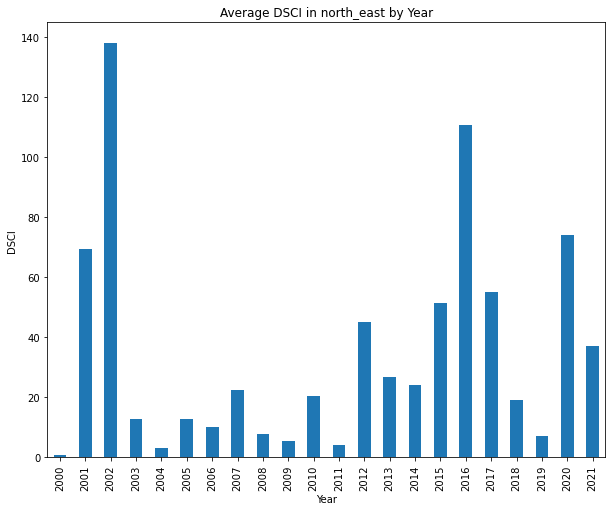

In [23]:
#function to graphic the DSCI for every region
def plot_avg_dsci(reg):
    years = reg.groupby(reg['ValidStart'].dt.year)['DSCI'].mean()
    years.plot(kind = 'bar', figsize = (10, 8))
    plt.xlabel("Year")
    plt.ylabel("DSCI")
    plt.title(f'Average DSCI in {reg["Region"].iloc[1]} by Year')
plot_avg_dsci(north_east_df2)

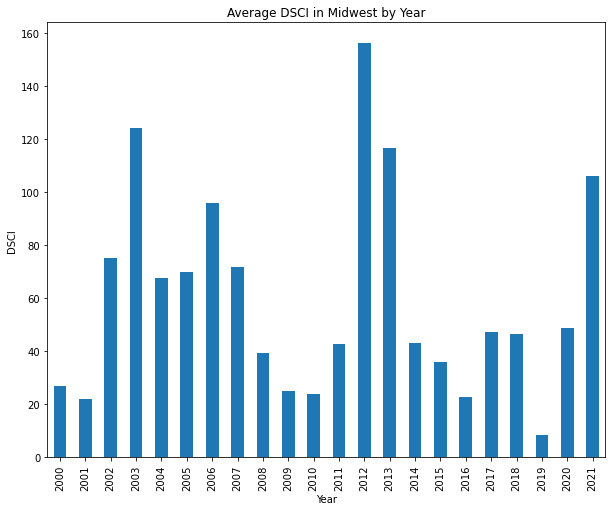

In [24]:
plot_avg_dsci(midwest_df2)

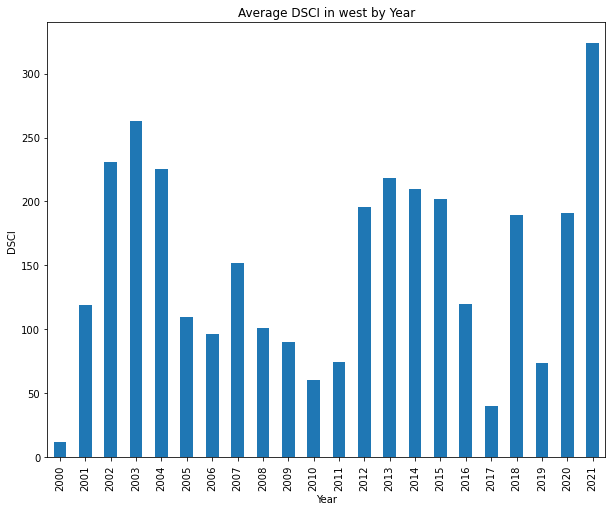

In [25]:
plot_avg_dsci(West_df2)

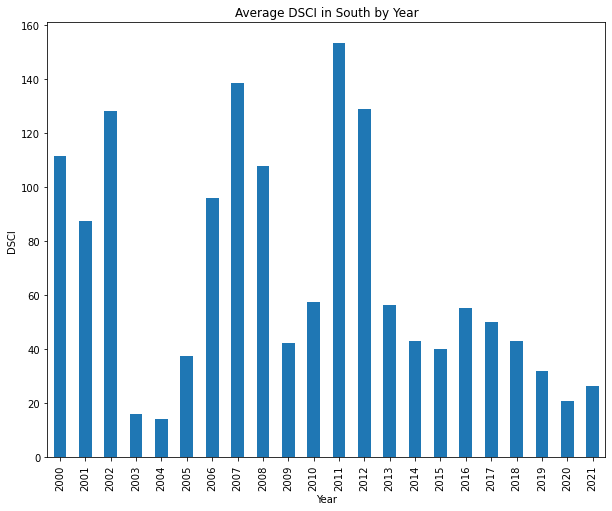

In [26]:
plot_avg_dsci(South_df2)

- ##### Merging the regions dataset

In [27]:
#concat the regions on one dataset
df_regions=[South_df2,West_df2,midwest_df2,north_east_df2]
regions=pd.concat(df_regions)

#taking the mean of DSCI of the new dataset
df_regions_years=regions.groupby(by=[regions['ValidStart'].dt.year,regions['Region']])['DSCI'].agg([ 'mean'])
df_regions_years.reset_index(inplace=True)

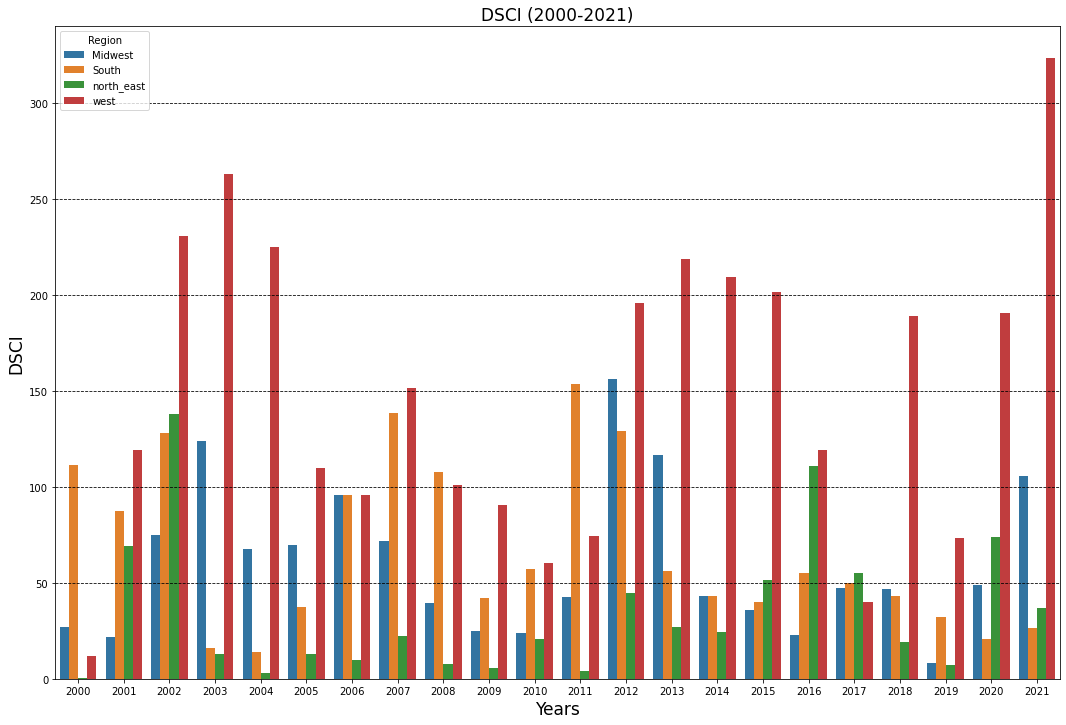

In [28]:
#graph the DCSI of the regions
plt.figure(figsize=(18, 12))
sns.barplot(x='ValidStart',
    y='mean',
    hue='Region',
    data=df_regions_years)
plt.title('DSCI (2000-2021)',fontdict={'fontsize':17});
plt.xlabel('Years',fontdict={'fontsize':17});
plt.ylabel('DSCI',fontdict={'fontsize':17});
plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.8)
plt.savefig('./images/DSCI_region.png')

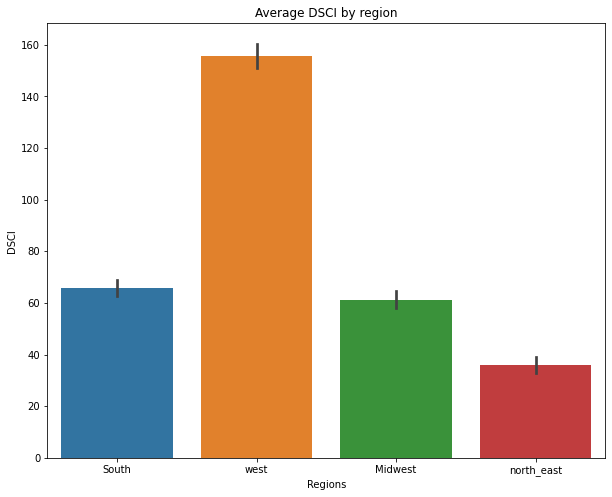

In [29]:
#graphic of the average DSCI by region
plt.figure(figsize=(10,8))
sns.barplot(x='Region',
    y='DSCI',
    data=regions);
plt.title('Average DSCI by region',fontdict={'fontsize':12});
plt.xlabel('Regions',fontdict={'fontsize':10});
plt.ylabel('DSCI',fontdict={'fontsize':10})
plt.savefig('./images/avg_dsci_region.png');

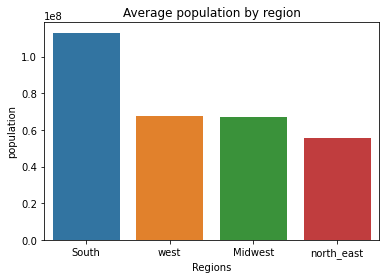

In [30]:
sns.barplot(x='Region',
    y='total_population',
    data=regions);
plt.title('Average population by region',fontdict={'fontsize':12});
plt.xlabel('Regions',fontdict={'fontsize':10});
plt.ylabel('population',fontdict={'fontsize':10});

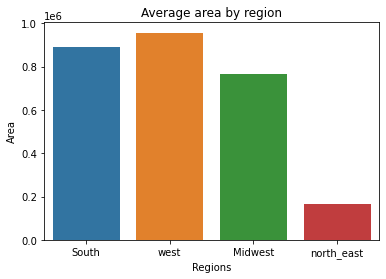

In [31]:
sns.barplot(x='Region',
    y='total_area',
    data=regions);
plt.title('Average area by region',fontdict={'fontsize':12});
plt.xlabel('Regions',fontdict={'fontsize':10});
plt.ylabel('Area',fontdict={'fontsize':10});

In [32]:
#change the format of the time of the regions
South_df2['ValidStart']= pd.to_datetime(drought_states['ValidStart'])
South_df2['ValidStart'] = drought_states['ValidStart'].dt.strftime('%m/%d/%Y')
South_df2['ValidStart']=drought_states['ValidStart'].astype('datetime64[ns]')
West_df2['ValidStart']= pd.to_datetime(drought_states['ValidStart'])
West_df2['ValidStart'] = drought_states['ValidStart'].dt.strftime('%m/%d/%Y')
West_df2['ValidStart']=drought_states['ValidStart'].astype('datetime64[ns]')
midwest_df2['ValidStart']= pd.to_datetime(drought_states['ValidStart'])
midwest_df2['ValidStart'] = drought_states['ValidStart'].dt.strftime('%m/%d/%Y')
midwest_df2['ValidStart']=drought_states['ValidStart'].astype('datetime64[ns]')
north_east_df2['ValidStart']= pd.to_datetime(drought_states['ValidStart'])
north_east_df2['ValidStart'] = drought_states['ValidStart'].dt.strftime('%m/%d/%Y')
north_east_df2['ValidStart']=drought_states['ValidStart'].astype('datetime64[ns]')

South_df2.set_index('ValidStart',inplace=True)
West_df2.set_index('ValidStart',inplace=True)
midwest_df2.set_index('ValidStart',inplace=True)
north_east_df2.set_index('ValidStart',inplace=True)


#### Time serie graph
---

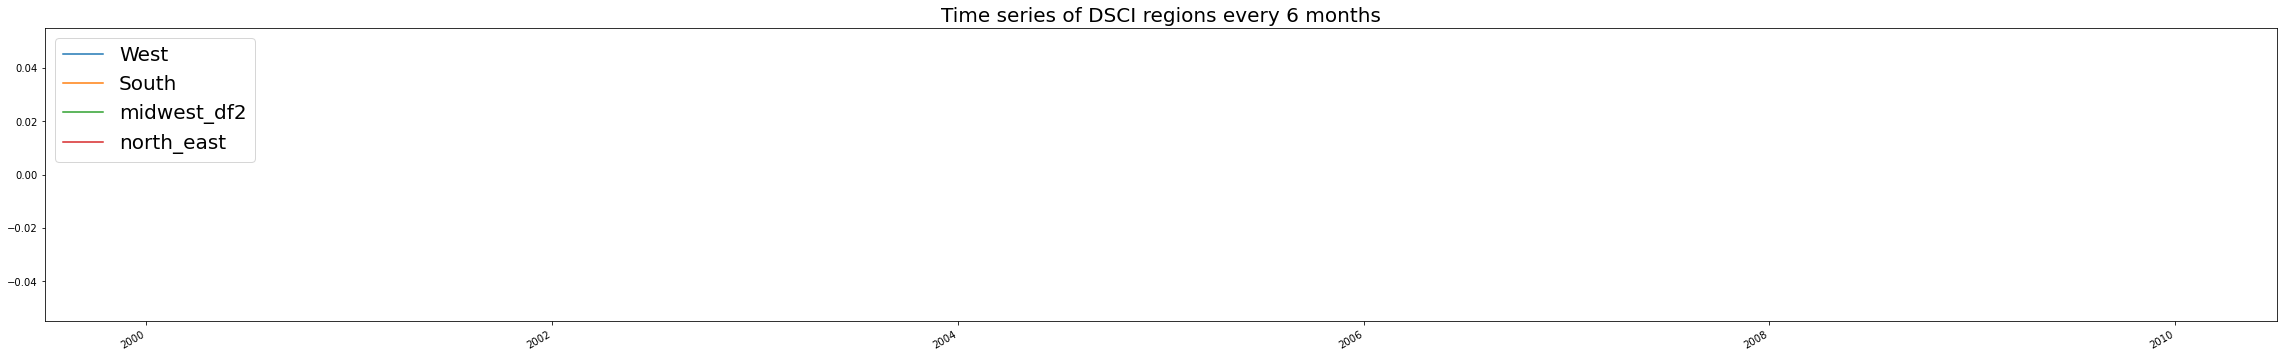

In [33]:
fig, ax = plt.subplots(figsize=(40, 6))

ax.plot(West_df2['DSCI'])
ax.plot(South_df2['DSCI'])
ax.plot(midwest_df2['DSCI'])
ax.plot(north_east_df2['DSCI'])

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.title('Time series of DSCI regions every 6 months',fontdict={'fontsize':20});
plt.legend(['West','South','midwest_df2','north_east'],loc='upper left',fontsize=20);
fig.autofmt_xdate()
plt.savefig('./images/6_months_region.png')

#### radar graphs
---

In [34]:
region_mean=regions.groupby('Region').agg({'area_d0':'mean','area_d1':'mean','area_d2':'mean','area_d3':'mean','area_d4':'mean'})

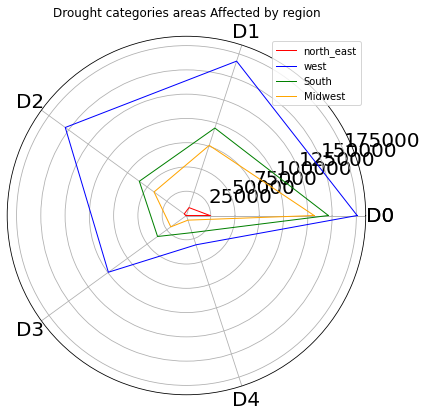

In [35]:
from math import pi
# Each attribute we'll plot in the radar chart.
labels = ['D0', 'D1', 'D2', 'D3', 'D4']

# Let's look at the 1970 Chevy Impala and plot it.
values = region_mean.loc['north_east'].tolist()
values1 = region_mean.loc['west'].tolist()
values2 = region_mean.loc['South'].tolist()
values3 = region_mean.loc['Midwest'].tolist()
# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
# values += values[:1]
# angles += angles[:1]
labels.append(labels[0])
angles.append(angles[0])
values.append(values[0])
values1.append(values1[0])
values2.append(values2[0])
values3.append(values3[0])
#ax = plt.subplot(polar=True)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
#ax.set_thetagrids(angles * 180/np.pi, labels)
# Draw the outline of our data.
ax.set_thetagrids(np.degrees(angles), labels)
ax.plot(angles, values, color='red', linewidth=1)
ax.plot(angles, values1, color='blue', linewidth=1)
ax.plot(angles, values2, color='green', linewidth=1)
ax.plot(angles, values3, color='orange', linewidth=1)

plt.tight_layout()
plt.title('Drought categories areas Affected by region')
plt.legend(['north_east','west','South','Midwest'])
plt.show()
#https://towardsdatascience.com/how-to-create-a-radar-chart-in-python-36b9ebaa7a64

In [36]:
region_mean_population=regions.groupby('Region').agg({'population_d0':'mean','population_d1':'mean','population_d2':'mean','population_d3':'mean','population_d4':'mean'})

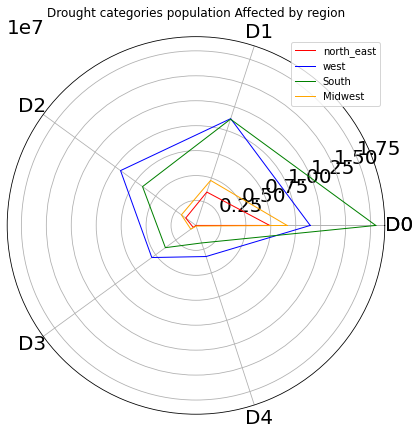

In [37]:
# Each attribute we'll plot in the radar chart.
labels = ['D0', 'D1', 'D2', 'D3', 'D4']

# Let's look at the 1970 Chevy Impala and plot it.
values = region_mean_population.loc['north_east'].tolist()
values1 = region_mean_population.loc['west'].tolist()
values2 = region_mean_population.loc['South'].tolist()
values3 = region_mean_population.loc['Midwest'].tolist()
# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
# values += values[:1]
# angles += angles[:1]
labels.append(labels[0])
angles.append(angles[0])
values.append(values[0])
values1.append(values1[0])
values2.append(values2[0])
values3.append(values3[0])
#ax = plt.subplot(polar=True)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
#ax.set_thetagrids(angles * 180/np.pi, labels)
# Draw the outline of our data.
ax.set_thetagrids(np.degrees(angles), labels)
ax.plot(angles, values, color='red', linewidth=1)
ax.plot(angles, values1, color='blue', linewidth=1)
ax.plot(angles, values2, color='green', linewidth=1)
ax.plot(angles, values3, color='orange', linewidth=1)

plt.tight_layout()
plt.title('Drought categories population Affected by region')
plt.legend(['north_east','west','South','Midwest'])
plt.show()
#https://towardsdatascience.com/how-to-create-a-radar-chart-in-python-36b9ebaa7a64

## West states analysis

In [38]:
west_df=West_df.groupby(by=[West_df['ValidStart'].dt.year,West_df['Name']])['DSCI'].agg([ 'mean'])
west_df.reset_index(inplace=True)

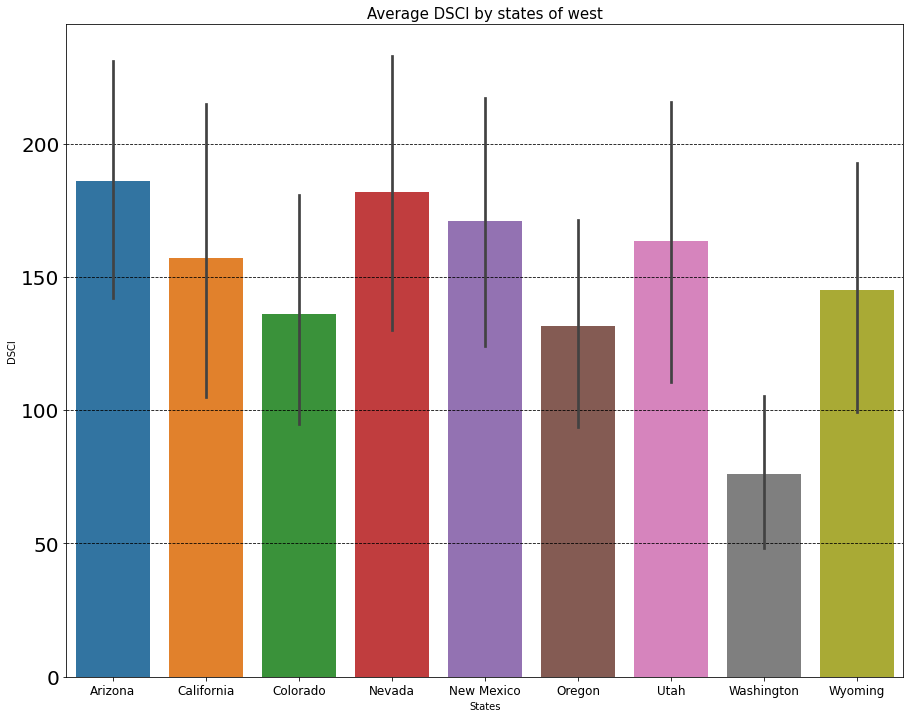

In [48]:
plt.figure(figsize=(15, 12))
sns.barplot(x='Name',
    y='mean',
    data=west_df);
plt.title('Average DSCI by states of west',fontdict={'fontsize':15});
plt.xticks(fontsize=(12))
plt.xlabel('States',fontdict={'fontsize':10});
plt.ylabel('DSCI',fontdict={'fontsize':10});
plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.8)

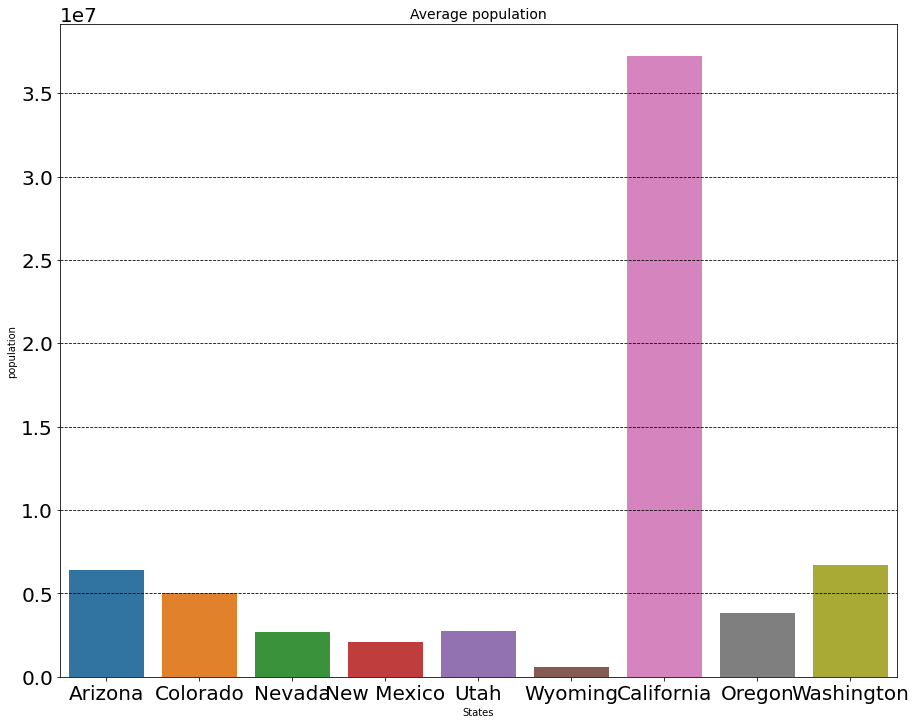

In [40]:
plt.figure(figsize=(15, 12))
sns.barplot(x='Name',
    y='total_population',
    data=West_df);
plt.title('Average population',fontdict={'fontsize':14});
plt.xlabel('States',fontdict={'fontsize':10});
plt.ylabel('population',fontdict={'fontsize':10});
plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.8)

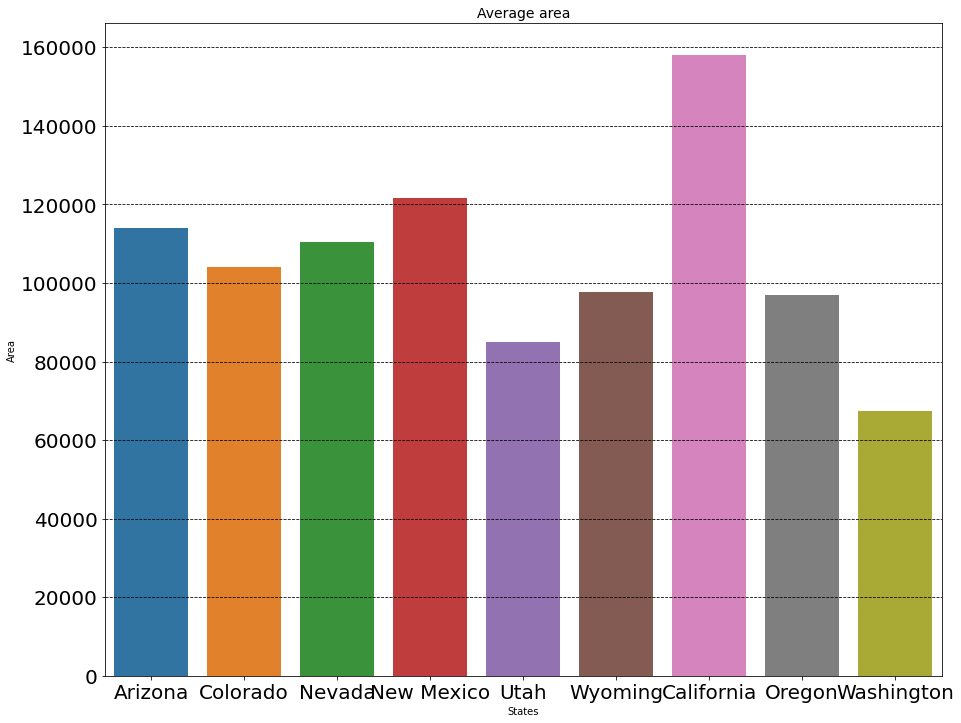

In [41]:
plt.figure(figsize=(15, 12))
sns.barplot(x='Name',
    y='total_area',
    data=West_df);
plt.title('Average area',fontdict={'fontsize':14});
plt.xlabel('States',fontdict={'fontsize':10});
plt.ylabel('Area',fontdict={'fontsize':10});
plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.8)

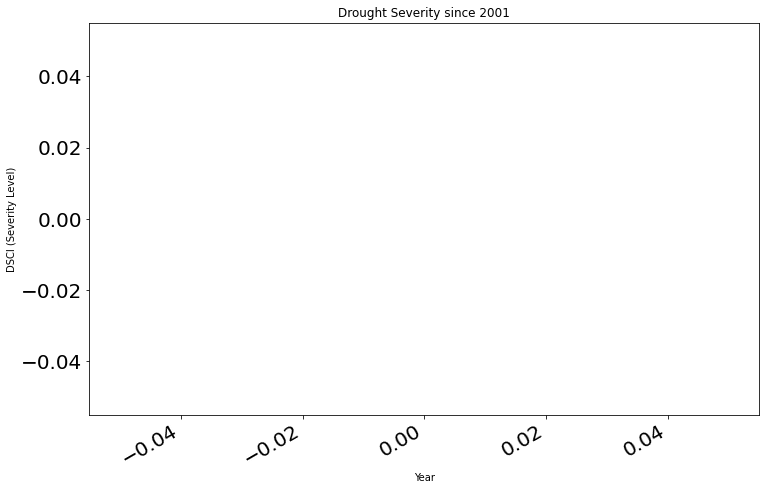

In [42]:
West_df2['DSCI'].plot(figsize = (12, 8))
plt.xlabel("Year")
plt.ylabel("DSCI (Severity Level)")
plt.title('Drought Severity since 2001')
plt.savefig('./images/western_dsci_years.png');

## midwest

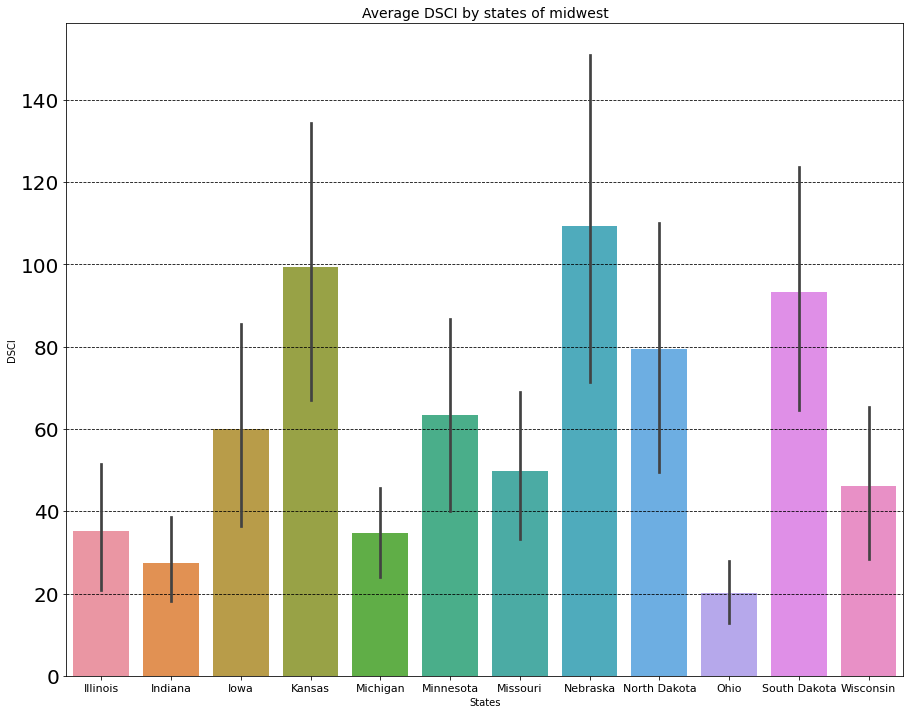

In [50]:
midwest=Midwest_df.groupby(by=[Midwest_df['ValidStart'].dt.year,Midwest_df['Name']])['DSCI'].agg([ 'mean'])
midwest.reset_index(inplace=True)

plt.figure(figsize=(15, 12))
sns.barplot(x='Name',
    y='mean',
    data=midwest);
plt.title('Average DSCI by states of midwest',fontdict={'fontsize':14});
plt.xlabel('States',fontdict={'fontsize':10})
plt.xticks(fontsize=(11))
plt.ylabel('DSCI',fontdict={'fontsize':10});
plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.8)

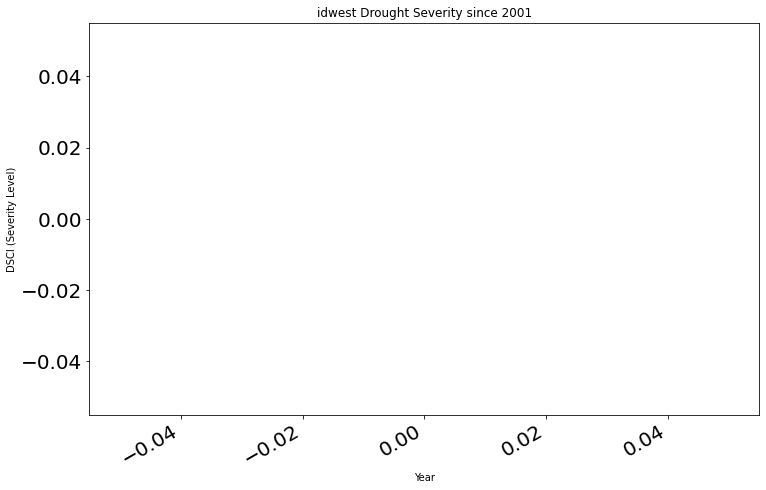

In [44]:
midwest_df2['DSCI'].plot(figsize = (12, 8))
plt.xlabel("Year")
plt.ylabel("DSCI (Severity Level)")
plt.title('Midwest Drought Severity since 2001');